In [4]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [5]:
#read the dataset
df = pd.read_csv('dataset.csv')

In [6]:
#display the top 5 rows of data
df.head()

,vehicle_speed_kmh,engine_speed_rpm,throttle_position_pct,engine_load_pct,fuel_rate_lph,fuel_consumption_l_per_100km,brake_usage_pct,acceleration_mps2,deceleration_mps2,gear_position,...,road_gradient_pct,traffic_conditions,weather_conditions,air_conditioning,vehicle_weight_kg,tire_pressure_psi,fuel_type,driver_id,fuel_consumed_liters,driver_profile
0,56.181018,2555.024502,72.999831,63.814457,6.679329,21.639205,74.155520,-2.744033,1.908987,3,...,7.884779,Heavy,Rainy,On,2288.107072,34.111108,Diesel,290,5.867612,4
1,142.607146,2331.016529,18.451200,45.929245,2.801538,13.879375,88.110188,1.971028,-2.128381,1,...,-9.049879,Heavy,Sunny,Off,1784.068780,31.078296,Diesel,53,4.790200,3
2,109.799091,1468.846519,34.663969,96.449852,3.400825,7.300243,46.317988,-1.504155,2.678783,2,...,-2.901642,Free,Sunny,Off,1088.663908,32.747261,Petrol,375,5.165074,4
3,89.798773,3839.966686,66.328064,21.897845,4.432751,19.206119,28.917873,-1.296376,2.059345,5,...,-8.958107,Medium,Snowy,Off,850.307832,31.336379,Petrol,82,5.004880,4
4,23.402796,3121.432883,48.208934,58.785642,4.869413,12.210919,31.884657,-1.642528,2.513120,2,...,8.323545,Medium,Snowy,Off,898.210438,30.255172,Petrol,499,3.532906,2


In [7]:
#display the button rows of data
df.tail()

,vehicle_speed_kmh,engine_speed_rpm,throttle_position_pct,engine_load_pct,fuel_rate_lph,fuel_consumption_l_per_100km,brake_usage_pct,acceleration_mps2,deceleration_mps2,gear_position,...,road_gradient_pct,traffic_conditions,weather_conditions,air_conditioning,vehicle_weight_kg,tire_pressure_psi,fuel_type,driver_id,fuel_consumed_liters,driver_profile
9995,128.648398,5323.712460,95.227545,75.403391,12.826459,24.255096,59.439653,-1.067226,2.469352,5,...,0.549287,Free,Sunny,Off,933.632009,33.355801,Petrol,471,9.092945,5
9996,134.626325,757.476765,74.782421,76.452694,5.297678,11.211279,94.661578,-0.752243,-2.750970,5,...,7.360520,Heavy,Snowy,On,1984.157404,30.784088,Diesel,234,6.982156,5
9997,142.006187,2170.341580,1.945586,26.956943,15.230907,9.702847,92.091850,-0.709790,-2.137580,4,...,-6.531183,Heavy,Sunny,On,2177.787891,30.901686,Petrol,210,2.674635,2
9998,59.623199,2938.260036,40.100484,43.431977,10.899207,11.961976,20.046436,-2.222206,-1.465625,5,...,8.228375,Free,Rainy,On,1444.555511,28.563379,Petrol,336,3.728070,2
9999,32.571061,1447.456479,25.739798,48.742370,17.372427,14.502335,9.918561,2.683722,2.566783,5,...,0.058392,Heavy,Rainy,On,1389.481282,33.126283,Petrol,473,3.305307,2


In [8]:
#display the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   vehicle_speed_kmh             10000 non-null  float64
 1   engine_speed_rpm              10000 non-null  float64
 2   throttle_position_pct         10000 non-null  float64
 3   engine_load_pct               10000 non-null  float64
 4   fuel_rate_lph                 10000 non-null  float64
 5   fuel_consumption_l_per_100km  10000 non-null  float64
 6   brake_usage_pct               10000 non-null  float64
 7   acceleration_mps2             10000 non-null  float64
 8   deceleration_mps2             10000 non-null  float64
 9   gear_position                 10000 non-null  int64  
 10  torque_nm                     10000 non-null  float64
 11  mass_air_flow_gps             10000 non-null  float64
 12  distance_travelled_km         10000 non-null  float64
 13  ro

In [9]:
# Generate descriptive statistics and add color
stat = df.describe().style.highlight_max(axis=0, color='green').highlight_min(axis=0, color='lightcoral')

# Display the styled description
stat

,vehicle_speed_kmh,engine_speed_rpm,throttle_position_pct,engine_load_pct,fuel_rate_lph,fuel_consumption_l_per_100km,brake_usage_pct,acceleration_mps2,deceleration_mps2,gear_position,torque_nm,mass_air_flow_gps,distance_travelled_km,road_gradient_pct,vehicle_weight_kg,tire_pressure_psi,driver_id,fuel_consumed_liters,driver_profile
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,74.123934,3274.914322,50.005039,49.871338,10.440412,14.069181,50.178812,-0.004653,0.006260,3.007800,225.835081,27.472246,249.214814,-0.066882,1651.114576,31.497826,252.037100,4.305291,3.000000
std,43.144519,1591.120029,28.677376,28.899459,5.496399,6.343508,28.765792,1.715808,1.749920,1.417371,101.096924,12.954295,144.874114,5.765288,490.582292,2.014590,143.633397,1.949556,1.414284
min,0.001745,500.867595,0.004812,0.000554,1.000318,3.000186,0.027012,-2.999220,-2.999227,1.000000,50.080115,5.013039,1.121314,-9.999954,800.044611,28.000033,1.000000,-1.615660,1.000000
25%,36.949330,1896.701908,25.374791,24.685725,5.641172,8.653042,25.388474,-1.488010,-1.537039,2.000000,137.211831,16.272042,122.872398,-5.048438,1228.028888,29.763632,128.000000,2.925108,2.000000
50%,73.879293,3282.432271,50.206809,50.003024,10.380627,14.133989,50.420945,-0.004611,0.025427,3.000000,227.624305,27.377557,249.044164,-0.137301,1646.430846,31.512303,254.000000,4.314672,3.000000
75%,111.000952,4660.635718,74.467385,74.711625,15.259064,19.575811,75.246919,1.486932,1.553965,4.000000,312.061612,38.560724,375.079199,4.806048,2074.875956,33.215829,374.000000,5.667510,4.000000
max,149.957651,5999.586548,99.990098,99.978937,19.999471,24.998673,99.968988,2.999251,2.999952,5.000000,399.970934,49.991260,499.958715,9.998716,2499.804835,34.999881,499.000000,10.575103,5.000000


In [10]:
# Set the style for plots
sns.set_style("whitegrid")

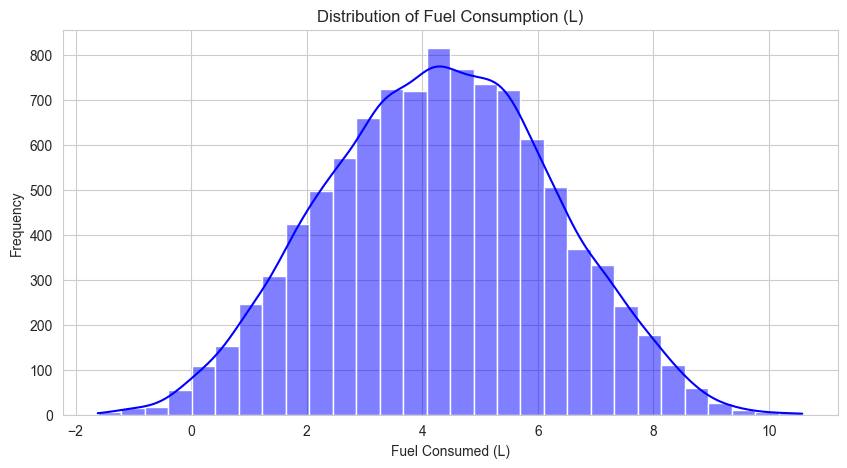

In [11]:
# Distribution of fuel consumption
plt.figure(figsize=(10, 5))
sns.histplot(df["fuel_consumed_liters"], bins=30, kde=True, color="blue")
plt.title("Distribution of Fuel Consumption (L)")
plt.xlabel("Fuel Consumed (L)")
plt.ylabel("Frequency")
plt.show()

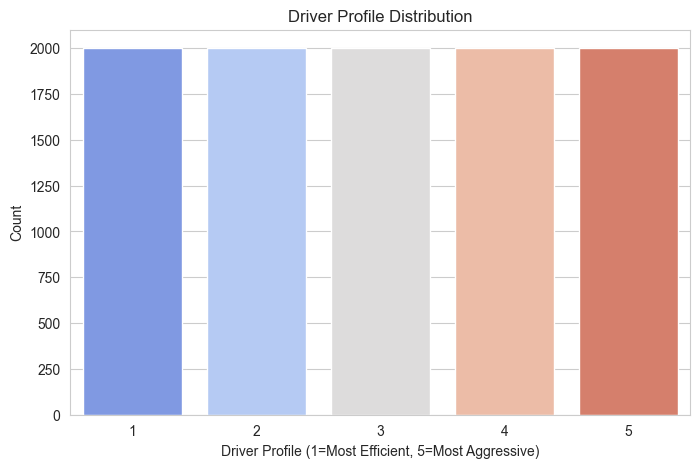

In [12]:
# Distribution of Driver Profile
plt.figure(figsize=(8, 5))
sns.countplot(x=df["driver_profile"], palette="coolwarm")
plt.title("Driver Profile Distribution")
plt.xlabel("Driver Profile (1=Most Efficient, 5=Most Aggressive)")
plt.ylabel("Count")
plt.show()

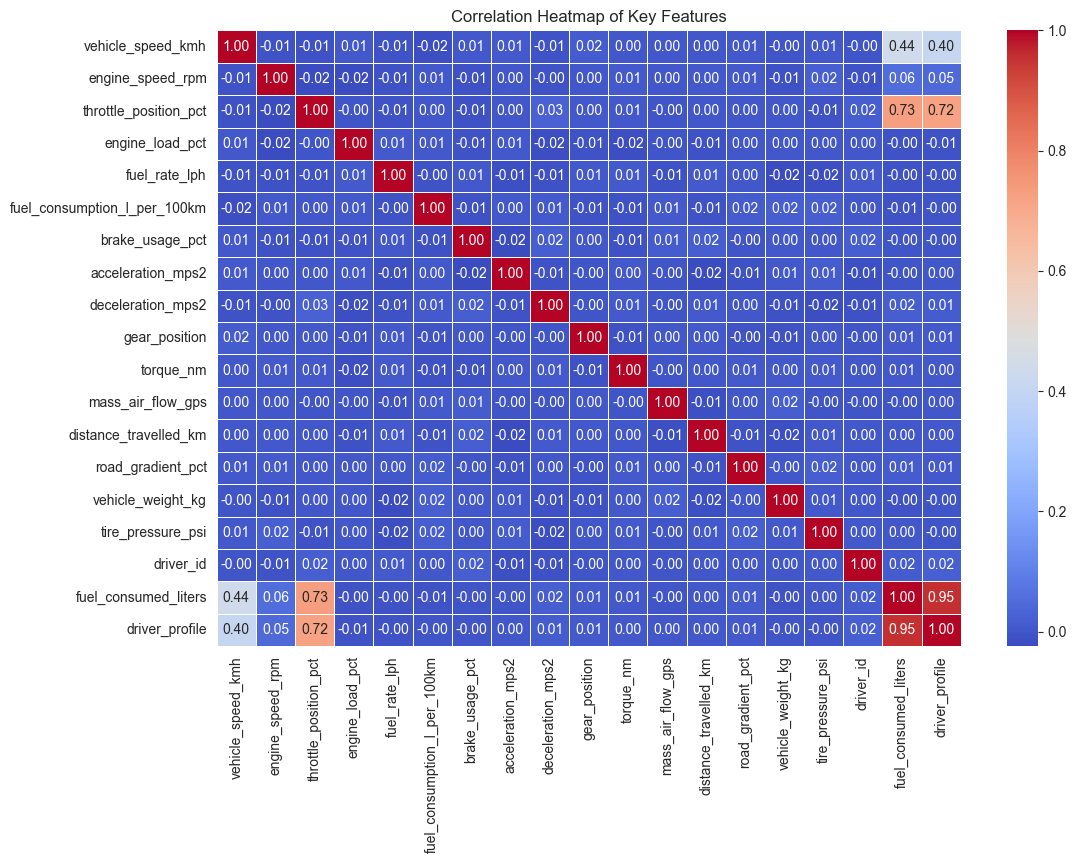

In [13]:
# correlation heatmap
#A correlation heatmap is a visual representation of how multiple variables are related to each other.
#It uses colored cells to show the strength and direction of the correlation between variables.

plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Features")
plt.show()

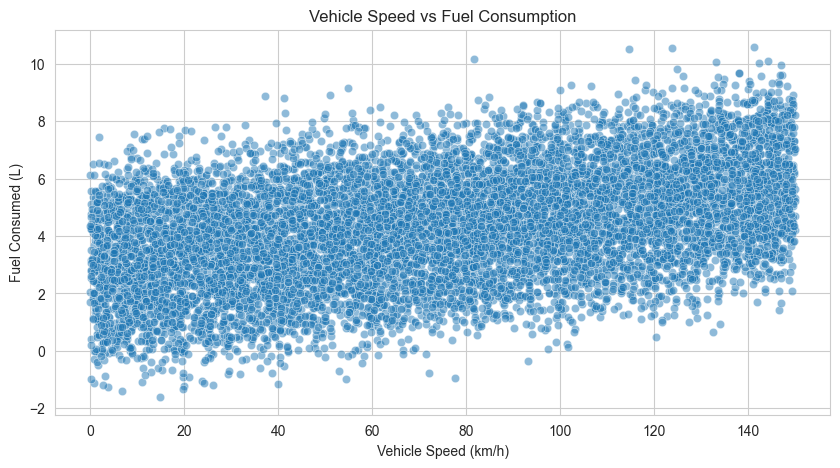

In [14]:
# Relationship between vehicle speed and fuel consumption
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["vehicle_speed_kmh"], y=df["fuel_consumed_liters"], alpha=0.5)
plt.title("Vehicle Speed vs Fuel Consumption")
plt.xlabel("Vehicle Speed (km/h)")
plt.ylabel("Fuel Consumed (L)")
plt.show()

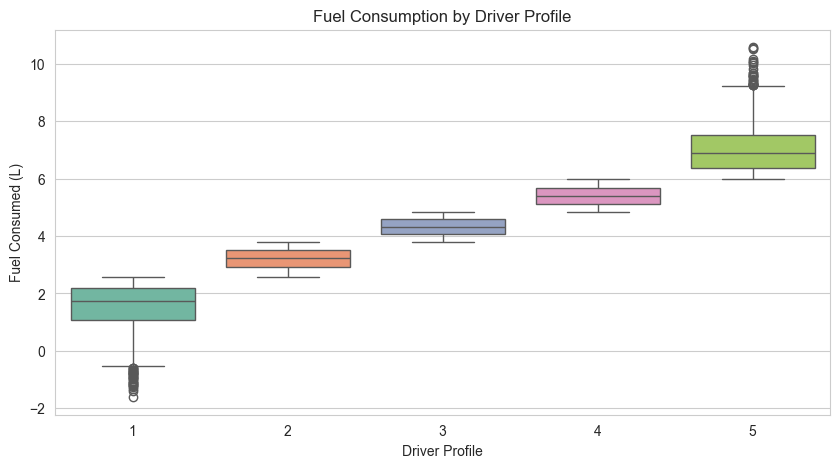

In [15]:
# Boxplot of Fuel Consumption by Driver Profile
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["driver_profile"], y=df["fuel_consumed_liters"], palette="Set2")
plt.title("Fuel Consumption by Driver Profile")
plt.xlabel("Driver Profile")
plt.ylabel("Fuel Consumed (L)")
plt.show()

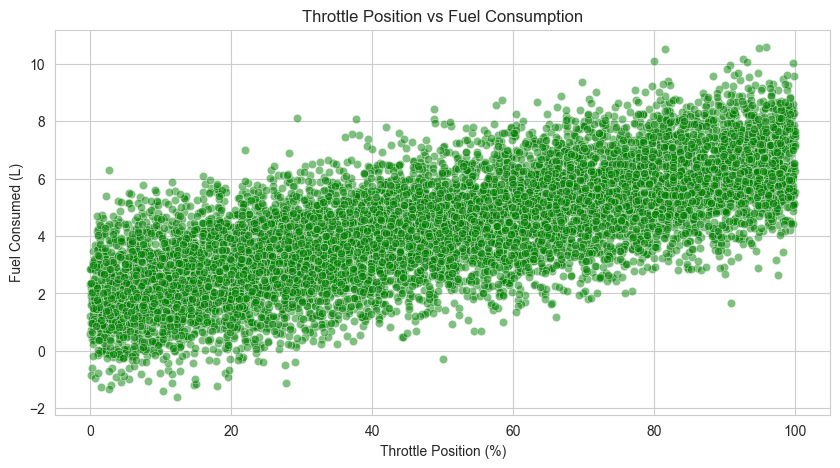

In [16]:
# Effect of Throttle Position on Fuel Consumption
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["throttle_position_pct"], y=df["fuel_consumed_liters"], alpha=0.5, color="green")
plt.title("Throttle Position vs Fuel Consumption")
plt.xlabel("Throttle Position (%)")
plt.ylabel("Fuel Consumed (L)")
plt.show()

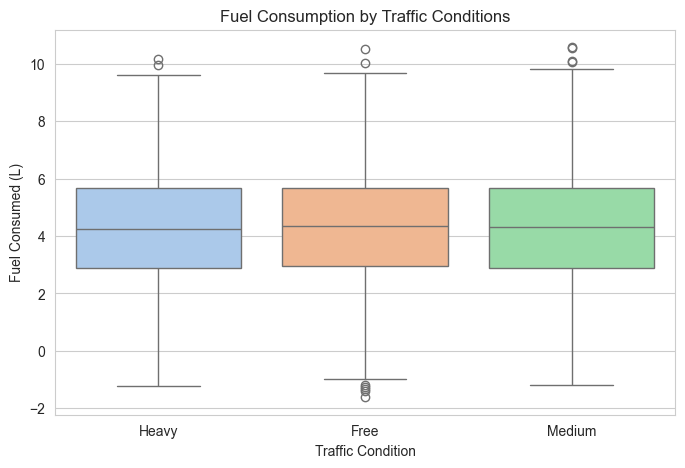

In [17]:
# Fuel Consumption based on Traffic Conditions
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["traffic_conditions"], y=df["fuel_consumed_liters"], palette="pastel")
plt.title("Fuel Consumption by Traffic Conditions")
plt.xlabel("Traffic Condition")
plt.ylabel("Fuel Consumed (L)")
plt.show()

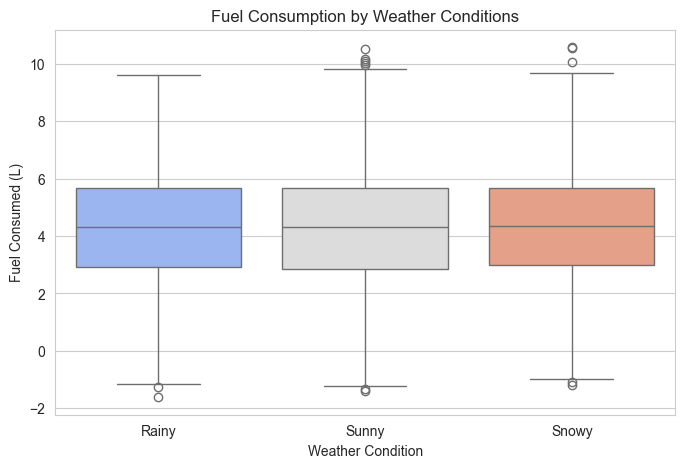

In [18]:
# Fuel Consumption by Weather Conditions
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["weather_conditions"], y=df["fuel_consumed_liters"], palette="coolwarm")
plt.title("Fuel Consumption by Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Fuel Consumed (L)")
plt.show()

In [19]:
# Preprocessing steps
missing_values = df.isnull().sum()
print(missing_values)

vehicle_speed_kmh               0
engine_speed_rpm                0
throttle_position_pct           0
engine_load_pct                 0
fuel_rate_lph                   0
fuel_consumption_l_per_100km    0
brake_usage_pct                 0
acceleration_mps2               0
deceleration_mps2               0
gear_position                   0
torque_nm                       0
mass_air_flow_gps               0
distance_travelled_km           0
road_gradient_pct               0
traffic_conditions              0
weather_conditions              0
air_conditioning                0
vehicle_weight_kg               0
tire_pressure_psi               0
fuel_type                       0
driver_id                       0
fuel_consumed_liters            0
driver_profile                  0
dtype: int64


In [20]:
# Label encode the categorical columns
df.columns

Index(['vehicle_speed_kmh', 'engine_speed_rpm', 'throttle_position_pct',
       'engine_load_pct', 'fuel_rate_lph', 'fuel_consumption_l_per_100km',
       'brake_usage_pct', 'acceleration_mps2', 'deceleration_mps2',
       'gear_position', 'torque_nm', 'mass_air_flow_gps',
       'distance_travelled_km', 'road_gradient_pct', 'traffic_conditions',
       'weather_conditions', 'air_conditioning', 'vehicle_weight_kg',
       'tire_pressure_psi', 'fuel_type', 'driver_id', 'fuel_consumed_liters',
       'driver_profile'],
      dtype='object')

In [21]:
#value counts for categorical features
df['traffic_conditions'].value_counts()

traffic_conditions
Heavy     3382
Free      3313
Medium    3305
Name: count, dtype: int64

In [22]:
df['weather_conditions'].value_counts()

weather_conditions
Rainy    3412
Sunny    3350
Snowy    3238
Name: count, dtype: int64

In [23]:
df['air_conditioning'].value_counts()

air_conditioning
Off    5158
On     4842
Name: count, dtype: int64

In [24]:
df['fuel_type'].value_counts()

fuel_type
Diesel    5007
Petrol    4993
Name: count, dtype: int64

In [25]:
# encode the things
categorical_features = ["traffic_conditions", "weather_conditions", "air_conditioning", "fuel_type"]
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [26]:
numerical_features = [
    "vehicle_speed_kmh", "engine_speed_rpm", "throttle_position_pct", "engine_load_pct",
    "fuel_rate_lph", "fuel_consumption_l_per_100km", "brake_usage_pct", "acceleration_mps2",
    "deceleration_mps2", "gear_position", "torque_nm", "mass_air_flow_gps", "distance_travelled_km",
    "road_gradient_pct", "vehicle_weight_kg", "tire_pressure_psi","driver_profile"
]

In [27]:
# Why StandardScaler?
# Centers the data (mean = 0)
# Scales it to unit variance (standard deviation = 1)
# Ensures features with different scales (e.g., speed in km/h vs. fuel rate in L/h) are comparable

scaler = StandardScaler()
# Apply scaling to numerical columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [28]:
# Define features and targets
X = df[numerical_features + categorical_features]
y_reg = df["fuel_consumed_liters"]

# Split dataset
X_train, X_test, y_reg_train, y_reg_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# Confirm split sizes
split_summary = {
    "X_train Shape": X_train.shape,
    "X_test Shape": X_test.shape,
    "Regression Target (y_train) Shape": y_reg_train.shape,
    "Regression Target (y_test) Shape": y_reg_test.shape
}

split_summary

{'X_train Shape': (8000, 21),
 'X_test Shape': (2000, 21),
 'Regression Target (y_train) Shape': (8000,),
 'Regression Target (y_test) Shape': (2000,)}

In [29]:
if df["driver_profile"].dtype != "int":
    df["driver_profile"] = pd.qcut(df["fuel_consumed_liters"], q=5, labels=[1, 2, 3, 4, 5])

# Recalculate the correct mapping of fuel consumption to driver profile
profile_fuel_avg = df.groupby("driver_profile")["fuel_consumed_liters"].mean()
profile_fuel_min = df.groupby("driver_profile")["fuel_consumed_liters"].min()
profile_fuel_max = df.groupby("driver_profile")["fuel_consumed_liters"].max()

# Create the corrected mapping of fuel ranges to driver profiles
fuel_profile = pd.DataFrame({
    "Driver Profile": profile_fuel_avg.index,
    "Average Fuel Consumed (L)": profile_fuel_avg.values,
    "Min Fuel Consumed (L)": profile_fuel_min.values,
    "Max Fuel Consumed (L)": profile_fuel_max.values
})

print(fuel_profile)

  Driver Profile  Average Fuel Consumed (L)  Min Fuel Consumed (L)  \
0              1                   1.556107              -1.615660   
1              2                   3.211785               2.565585   
2              3                   4.321965               3.797381   
3              4                   5.399095               4.849055   
4              5                   7.037503               5.988733   

   Max Fuel Consumed (L)  
0               2.565376  
1               3.796992  
2               4.848310  
3               5.988688  
4              10.575103  


In [30]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_reg_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Compute evaluation metrics
rf_metrics = {
    "Model": "Random Forest Regressor",
    "MAE": mean_absolute_error(y_reg_test, y_pred_rf),
    "MSE": mean_squared_error(y_reg_test, y_pred_rf),
    "RMSE": np.sqrt(mean_squared_error(y_reg_test, y_pred_rf)),
    "R2 Score": r2_score(y_reg_test, y_pred_rf)
}

In [ ]:
print(rf_metrics)

{'Model': 'Random Forest Regressor', 'MAE': 0.378152304468558, 'MSE': 0.24957125331622035, 'RMSE': 0.49957106933470474, 'R2 Score': 0.9340385321330072}


In [32]:
# The dictionary containing your values
rf_metrics = {
    'Model': 'Random Forest Regressor',
    'MAE': 0.8121234693942653,
    'MSE': 1.0235123695787431,
    'RMSE': 1.0116878815023649,
    'R2 Score': 0.7294865599288549
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(list(rf_metrics.items()), columns=['Metric', 'Value'])

# Display the DataFrame as a table
print(df)

     Metric                    Value
0     Model  Random Forest Regressor
1       MAE                 0.812123
2       MSE                 1.023512
3      RMSE                 1.011688
4  R2 Score                 0.729487


In [33]:
# Train and evaluate Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_reg_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(X_test)

# Compute evaluation metrics
ridge_metrics = {
    "Model": "Ridge Regression",
    "MAE": mean_absolute_error(y_reg_test, y_pred_ridge),
    "MSE": mean_squared_error(y_reg_test, y_pred_ridge),
    "RMSE": np.sqrt(mean_squared_error(y_reg_test, y_pred_ridge)),
    "R2 Score": r2_score(y_reg_test, y_pred_ridge)
}

print(ridge_metrics)


{'Model': 'Ridge Regression', 'MAE': 0.3930475698795531, 'MSE': 0.2758873790129258, 'RMSE': 0.525249825333551, 'R2 Score': 0.9270832027172128}


In [34]:

ridge_metrics = {
    'Model': 'Ridge Regression',
    'MAE': 0.7787572717364426,
    'MSE': 0.9480393812666081,
    'RMSE': 0.9736731388236034,
    'R2 Score': 0.7494340059076153
}

# Convert the dictionary into a DataFrame
df_ridge = pd.DataFrame(list(ridge_metrics.items()), columns=['Metric', 'Value'])

# Display the DataFrame as a table
print(df_ridge)


     Metric             Value
0     Model  Ridge Regression
1       MAE          0.778757
2       MSE          0.948039
3      RMSE          0.973673
4  R2 Score          0.749434


In [35]:
# Train and evaluate AdaBoost Regressor
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_reg_train)

# Predict on test data
y_pred_adaboost = adaboost_model.predict(X_test)

# Compute evaluation metrics
adaboost_metrics = {
    "Model": "AdaBoost Regressor",
    "MAE": mean_absolute_error(y_reg_test, y_pred_adaboost),
    "MSE": mean_squared_error(y_reg_test, y_pred_adaboost),
    "RMSE": np.sqrt(mean_squared_error(y_reg_test, y_pred_adaboost)),
    "R2 Score": r2_score(y_reg_test, y_pred_adaboost)
}
print(adaboost_metrics)

{'Model': 'AdaBoost Regressor', 'MAE': 0.4288954387686394, 'MSE': 0.31038628381373107, 'RMSE': 0.5571232213915797, 'R2 Score': 0.9179651718133032}


In [36]:
# The dictionary containing your values for AdaBoost Regressor
adaboost_metrics = {
    'Model': 'AdaBoost Regressor',
    'MAE': 0.8299167404376783,
    'MSE': 1.0711875275225695,
    'RMSE': 1.0349818971955835,
    'R2 Score': 0.7168860566377929
}

# Convert the dictionary into a DataFrame
df_adaboost = pd.DataFrame(list(adaboost_metrics.items()), columns=['Metric', 'Value'])

# Display the DataFrame as a table
print(df_adaboost)

     Metric               Value
0     Model  AdaBoost Regressor
1       MAE            0.829917
2       MSE            1.071188
3      RMSE            1.034982
4  R2 Score            0.716886


In [37]:
# Train and evaluate XGBoost Regressor
xgbr_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgbr_model.fit(X_train, y_reg_train)

# Predict on test data
y_pred_xgbr = xgbr_model.predict(X_test)

# Compute evaluation metrics
xgbr_metrics = {
    "Model": "XGBoost Regressor",
    "MAE": mean_absolute_error(y_reg_test, y_pred_xgbr),
    "MSE": mean_squared_error(y_reg_test, y_pred_xgbr),
    "RMSE": np.sqrt(mean_squared_error(y_reg_test, y_pred_xgbr)),
    "R2 Score": r2_score(y_reg_test, y_pred_xgbr)
}
print(xgbr_metrics)

{'Model': 'XGBoost Regressor', 'MAE': 0.4027703097664911, 'MSE': 0.2783550291454429, 'RMSE': 0.5275936212137547, 'R2 Score': 0.9264310049069274}


In [38]:
# The dictionary containing your values for XGBoost Regressor
xgboost_metrics = {
    'Model': 'XGBoost Regressor',
    'MAE': 0.8616139629998983,
    'MSE': 1.1482600705399832,
    'RMSE': 1.0715689760999911,
    'R2 Score': 0.6965158497244628
}

# Convert the dictionary into a DataFrame
df_xgboost = pd.DataFrame(list(xgboost_metrics.items()), columns=['Metric', 'Value'])

# Display the DataFrame as a table
print(df_xgboost)


     Metric              Value
0     Model  XGBoost Regressor
1       MAE           0.861614
2       MSE            1.14826
3      RMSE           1.071569
4  R2 Score           0.696516


In [39]:
# Train and evaluate Support Vector Regressor (SVR)
svr_model = SVR(kernel="rbf")
svr_model.fit(X_train, y_reg_train)

# Predict on test data
y_pred_svr = svr_model.predict(X_test)

# Compute evaluation metrics
svr_metrics = {
    "Model": "Support Vector Regressor (SVR)",
    "MAE": mean_absolute_error(y_reg_test, y_pred_svr),
    "MSE": mean_squared_error(y_reg_test, y_pred_svr),
    "RMSE": np.sqrt(mean_squared_error(y_reg_test, y_pred_svr)),
    "R2 Score": r2_score(y_reg_test, y_pred_svr)
}
print(svr_metrics)

{'Model': 'Support Vector Regressor (SVR)', 'MAE': 0.409821241323277, 'MSE': 0.31465588650739246, 'RMSE': 0.560941963582145, 'R2 Score': 0.9168367194890047}


In [40]:
# The dictionary containing your values for Support Vector Regressor (SVR)
svr_metrics = {
    'Model': 'Support Vector Regressor (SVR)',
    'MAE': 0.8179793096944296,
    'MSE': 1.0578076875574605,
    'RMSE': 1.0284977819895678,
    'R2 Score': 0.7204223368471399
}

# Convert the dictionary into a DataFrame
df_svr = pd.DataFrame(list(svr_metrics.items()), columns=['Metric', 'Value'])

# Display the DataFrame as a table
print(df_svr)

     Metric                           Value
0     Model  Support Vector Regressor (SVR)
1       MAE                        0.817979
2       MSE                        1.057808
3      RMSE                        1.028498
4  R2 Score                        0.720422


In [42]:

# Prediction Logic
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_reg_train)

# Step 2: Predict Fuel Consumption on Test Data
y_pred_rf = rf_model.predict(X_test)

# Step 3: Create a Function to Predict Fuel and Map to Driver Profile
def predict_fuel_and_profile(input_data):
    """
    This function takes input feature data, predicts fuel consumption using RF model,
    and maps it to the correct driver profile based on fuel consumption ranges.
    """
    # Predict fuel consumption
    predicted_fuel = rf_model.predict(input_data)[0]

    # Determine the correct driver profile based on predicted fuel consumption
    driver_profile = fuel_profile[
        (fuel_profile["Min Fuel Consumed (L)"] <= predicted_fuel) & 
        (fuel_profile["Max Fuel Consumed (L)"] >= predicted_fuel)
    ]["Driver Profile"].values[0]

    return {"Predicted Fuel Consumption (L)": predicted_fuel, "Predicted Driver Profile": driver_profile}

# Step 4: Test the Function with a Sample Data Point
random_sample = X_test.iloc[[15]]  # test sample
prediction_result = predict_fuel_and_profile(random_sample)

print(prediction_result)

{'Predicted Fuel Consumption (L)': 1.245645456133112, 'Predicted Driver Profile': 1}
